# Pitch Analysis

Three methods:

1. Argmax
2. pyAudioAnalysis (Will send different notebook)
3. Parselmouth library



In [1]:
pip install numpy scipy pyAudioAnalysis eyed3 pydub hdbscan noisereduce praat-parselmouth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 30.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 20.6 MB/s eta 0:00:00
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264372 sha256=b57b1eb45478268952d32db098fd22026941bdf8d50c47d86bd9a97b8d8d6f17
  Stored in directory: /root/.cache/pip/wheels/a7/54/73/fa830689c2440d2c81ff175c60e374930ad1607a8881e0f43f
  Created wheel for hd

In [2]:
# Import Libraries
import numpy as np
import scipy
from scipy.io import wavfile
import numpy as np
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt
import parselmouth

In [3]:
# Mount Drive to access files on google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Test that you can access relevant files -- and choose file for analysis
from scipy.io import wavfile
demoFile = '/content/drive/MyDrive/Rose_Bird/Demo_Wav_files/USA5207_45107.23982155_6_30_6_39_42.wav'
samplerate, data = wavfile.read(demoFile)
masterTime = np.arange(len(data))/samplerate

# Spectrogram Generation

In [5]:
def wavToSpec(inputFile,**kwargs):
  samplerate, data = wavfile.read(inputFile)
  FS = samplerate # input
  NFFT = 512
  noverlap = 450  # noverlap > NFFT/2

  # Create Spectrogram
  spectrum, freqs, t, im = plt.specgram(data, NFFT=NFFT, Fs=FS, noverlap=noverlap,cmap='jet')

  # Manual Params (can be changed)
  logThresh = 3
  afterThresh = 4

  # Take log then delete elements below another thresh after log
  filterSpec = np.log(spectrum + logThresh)
  # filterSpec[np.where(filterSpec < afterThresh)] = 0

  return filterSpec, t, freqs

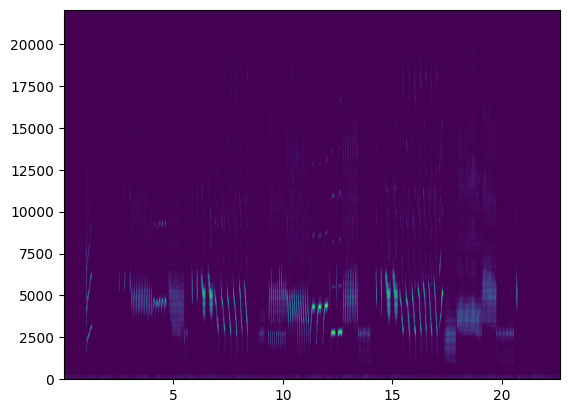

In [9]:
plt.figure(figsize = (50,10))
filterSpec, t, freqs = wavToSpec(demoFile)
plt.imshow(filterSpec, origin = 'lower',aspect = 'auto',extent = [t[0],t[-1],freqs[0],freqs[-1]])
plt.show()

# Method 1

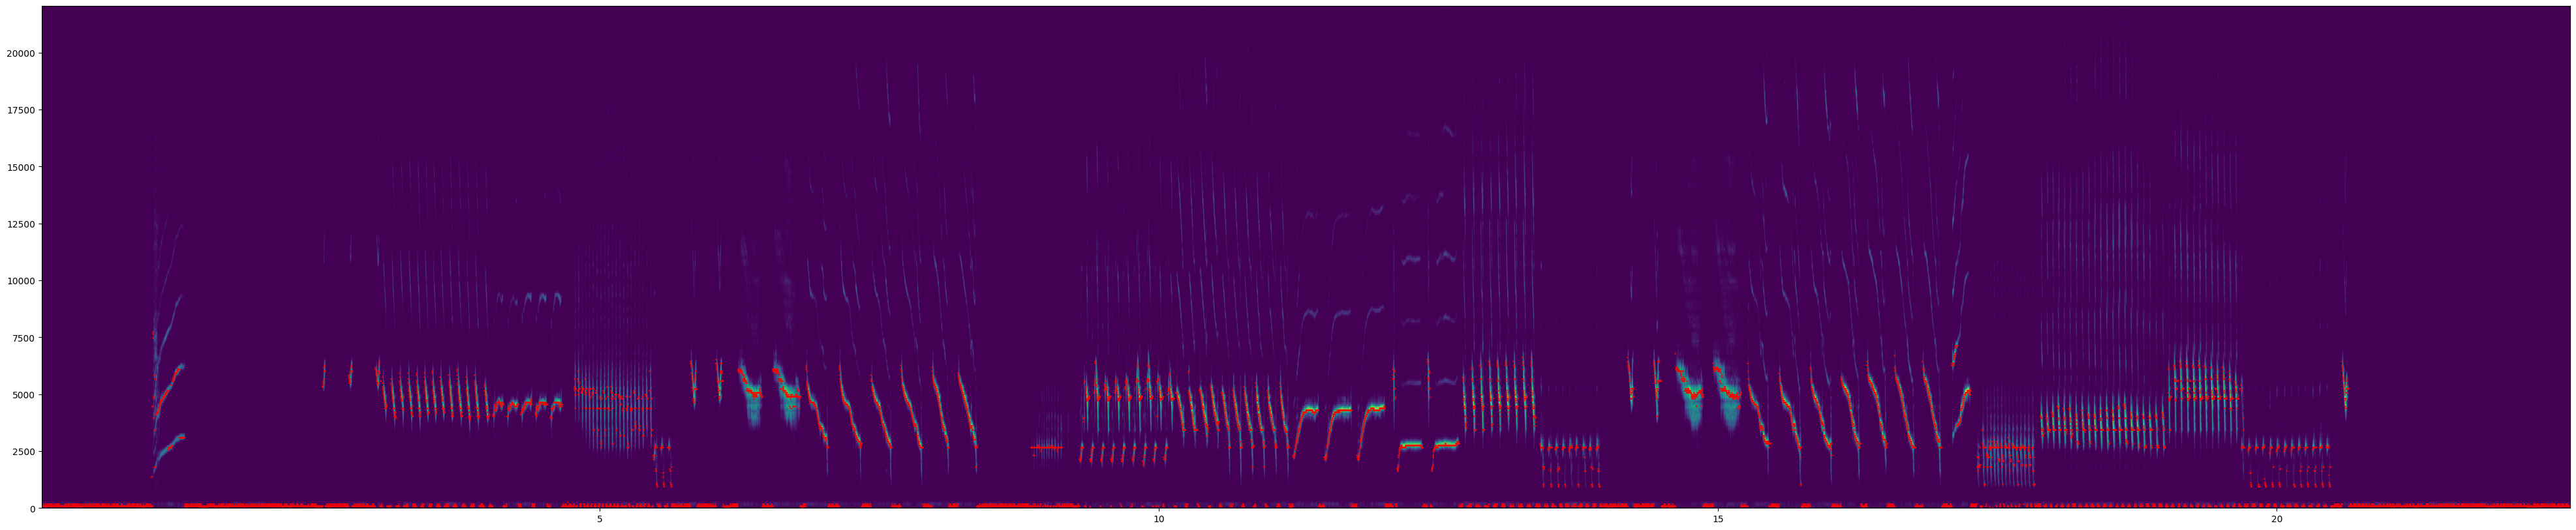

In [11]:
plt.figure(figsize = (50,10))

max_indices = np.argmax(filterSpec[:,:], axis=0)
plt.scatter(np.linspace(0,t[-1],num = len(max_indices)),freqs[max_indices], s = .5,color = 'red')

plt.imshow(filterSpec,aspect = 'auto',origin = 'lower',extent = [t[0],t[-1],freqs[0],freqs[-1]])
plt.show()

# Method 3

In [23]:
#https://zuker.io/articles/2019-07/parselmouth-contour

demoSound = parselmouth.Sound(demoFile)


pitchA = demoSound.to_pitch(time_step = .0005,pitch_ceiling = 20000)# can also set pitch_floor

pitch_values = pitchA.selected_array['frequency']


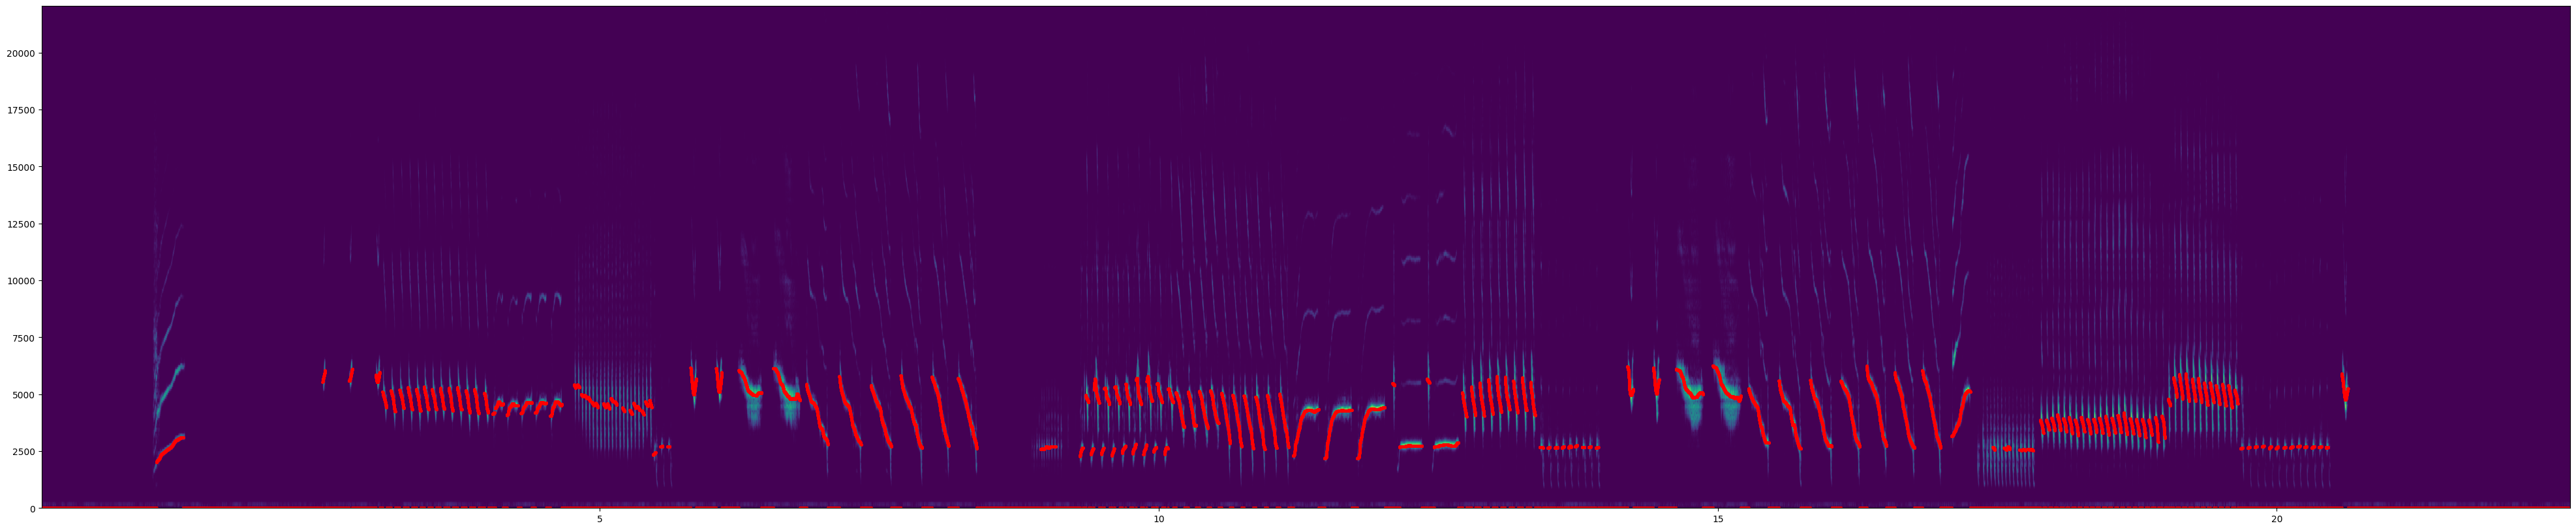

In [24]:

plt.figure(figsize = (50,10))
plt.imshow(filterSpec,aspect = 'auto',origin = 'lower',extent = [t[0],t[-1],freqs[0],freqs[-1]])
plt.plot(pitchA.xs(), pitch_values, 'o', markersize=2.5, color='red')
plt.show()